In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse
from scipy.sparse.linalg import eigsh, expm_multiply, expm

### Correlator generalized for L sites

In [3]:
def gen_spin_operators(L):
    """Returns the spin-1/2 operators sigma_x and sigma_z for L sites."""
    X = sparse.csr_array(np.array([[0.,1.],[1.,0.]]))
    Z = sparse.csr_array(np.diag([1.,-1.]))
    
    d = 2
    Sx_list = []
    Sz_list = []
    
    for i_site in range(L):
        # ops on first site
        if i_site == 0: 
            Sx = X
            Sz = Z 
        else: 
            Sx = sparse.csr_array(np.eye(d))
            Sz = sparse.csr_array(np.eye(d))
        # ops on remaining sites
        for j_site in range(1, L):
            if j_site == i_site: 
                Sx = sparse.kron(Sx, X, 'csr')
                Sz = sparse.kron(Sz, Z, 'csr')
            else:
                Sx = sparse.kron(Sx, np.eye(d), 'csr')
                Sz = sparse.kron(Sz, np.eye(d), 'csr')
        Sx_list.append(Sx)
        Sz_list.append(Sz)
    
    return Sx_list, Sz_list

def gen_hamiltonian_terms(L, Sx_list, Sz_list):
    """Generates the XX and Z terms of the Hamiltonian."""
    D = Sx_list[0].shape[0]
    print(f'System with {L:d} sites, Hilbert space dimension is {D:d}.')

    # Ising interaction
    Hxx = Sx_list[0] @ Sx_list[1]
    for i in range(1, L-1):
        Hxx += Sx_list[i] @ Sx_list[i+1]
    
    # onsite field terms
    Hz = Sz_list[0]
    for Sz in Sz_list[1:L]:
        Hz += Sz
    
    return Hxx, Hz

In [4]:
# define Hamiltonian terms
L = 11
J = 1.
g = 2.    


Sx_list, Sz_list = gen_spin_operators(L)
Hxx, Hz = gen_hamiltonian_terms(L, Sx_list, Sz_list)

H = -J * Hxx -g * Hz

System with 11 sites, Hilbert space dimension is 2048.


In [5]:
# compute correlator
dt = 1e-2
n = 10
N = 2**n

# get ground state
E, psi = eigsh(H, k=1, which='SA')
E0, psi = np.squeeze(E), np.squeeze(psi)
print('Ground state energy:', E0)
psi_0 = psi.copy()

# put in excitation
psi = Sx_list[L//2] @ psi
E1 = np.dot(psi.conj(), H @ psi).real
print('Excited state energy:', E1)

psil = np.array([Sx_list[l] @ psi_0 for l in range(L)])


# evolve states in time
psis = expm_multiply(-1j * H,
                     psi,
                     start=0,
                     stop=N*dt,
                     num=N,
                     endpoint=False)

# calculate correlators C = <psi| e^iHt X_ell e^-iHt X_L/2 |psi>
Cs = np.einsum('lj, ij -> li', psil.conj(), psis) * np.exp(1j * E0 * np.arange(N) * dt)

Ground state energy: -23.266407934929784
Excited state energy: -19.52953059144965


In [6]:
print(Cs.shape) 
#form is (L,2**n) <-> (X,T)

(11, 1024)


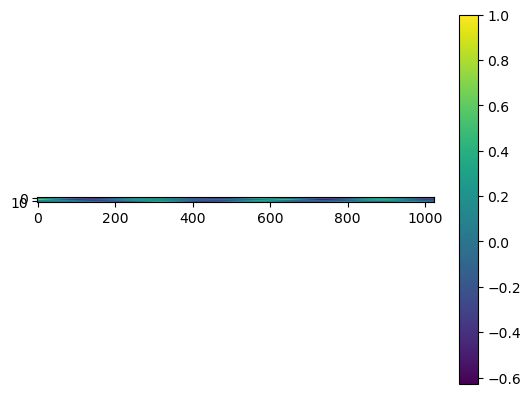

In [7]:
plt.imshow(Cs.real)
plt.colorbar()

In [8]:
import importlib

import sys
sys.path.append('/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/Chebyshev')
sys.path.append('/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/TCI')

import Chebyshev as Cbs
import TCI_Lsite as TCI

importlib.reload(Cbs)
importlib.reload(TCI)

<module 'TCI_Lsite' from '/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/TCI/TCI_Lsite.py'>

### Interpolation with TCI

In [16]:
D = L

func_vals = Cs.T #Cs is in the form (X,T)

#first we define the function f(t)
# which returns the slice of func_vals along x for a specific time 
f_t = lambda *t: Cs.reshape((D,) + (2,) * n)[:,*t]
#here we have to define func as the initialization of the class
func = TCI.function(f_t)

As, _, eval, err_2, err_max, func_interp = TCI.tensor_cross_interpolation(func,         # function to be interpolated
                                   func_vals,    
                                   D,
                                   L=n,          # number of MPS tensors
                                   eps_or_chi=10, # bond dimension
                                   iters=4)       # number of back-and-forth sweeps

print(np.linalg.norm(func_vals), np.max(np.abs(func_vals)))

(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,

In [10]:
print(err_max)
print(err_2)

0.00010073715696548895
5.8608274866582076e-05


/Users/Giovanni/miniconda3/envs/Computational/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/Giovanni/miniconda3/envs/Computational/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


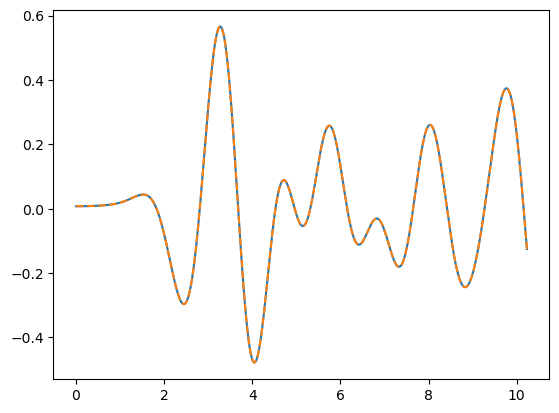

In [11]:
ts = np.arange(N)*dt

plt.plot(ts, func_vals[:,0])
plt.plot(ts, func_interp[:,0], '--')

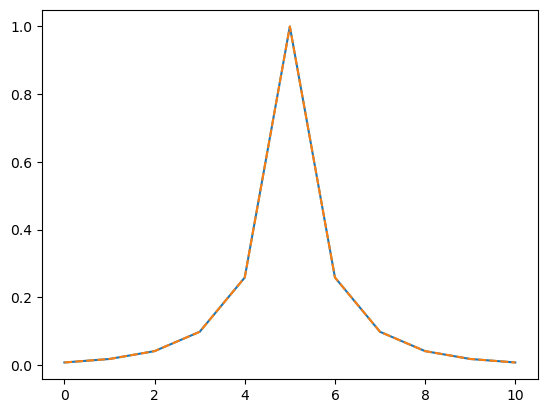

In [12]:
xs = np.arange(L)
plt.plot(xs, func_vals[0,:], "-")
plt.plot(xs, func_interp[0,:], "--")

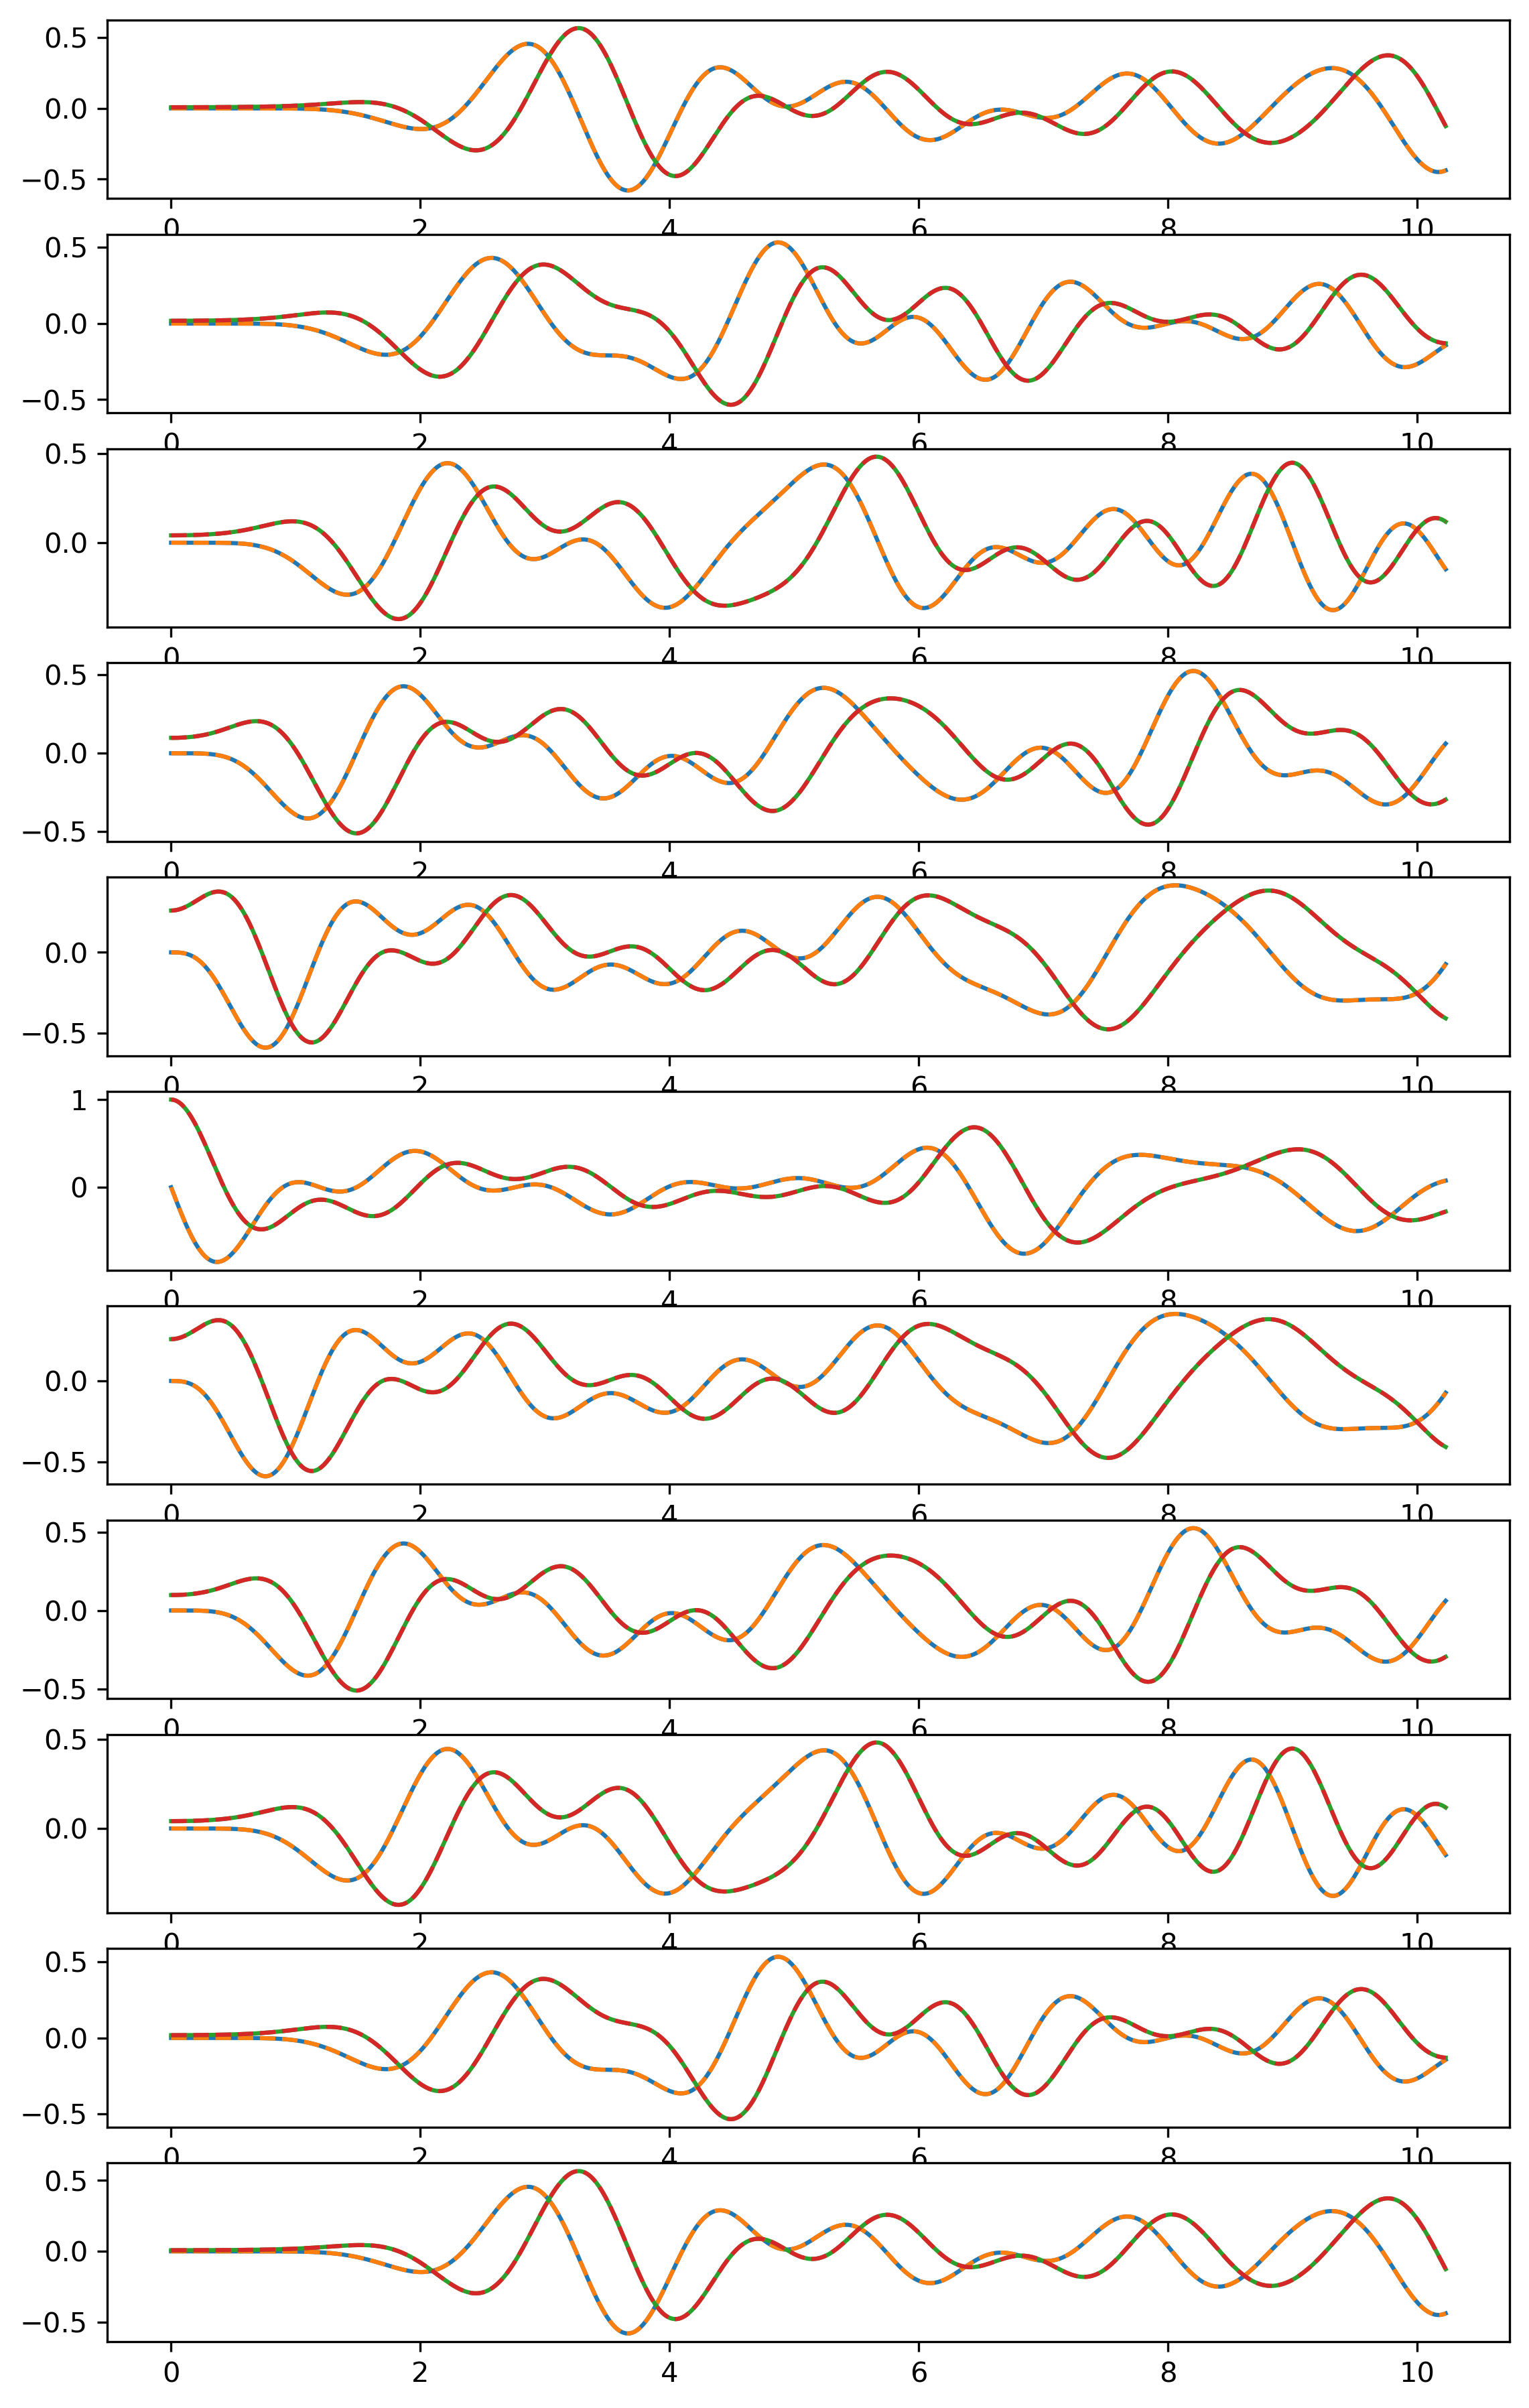

In [17]:
D_list = np.arange(D)

fig, axs = plt.subplots(nrows=D, figsize=(9,15), dpi=300)



for i,item in enumerate(D_list):
    axs[i].plot(ts, np.imag(func_vals[:,item]), '-')
    axs[i].plot(ts, np.imag(func_interp[:,item]), '--')
    axs[i].plot(ts, np.real(func_vals[:,item]), '-')
    axs[i].plot(ts, np.real(func_interp[:,item]), '--')

plt.show()

### Interpolation with Chebyshev

In [51]:
# compute correlator
dt = 1e-2
n = 10
N = 2**n
D = 11


# calculate correlators C = <psi| e^iHt X e^-iHt X |psi>
def Cs_chebyshev_Dsites(D_list, t_matrix):

    D = len(D_list)

    # get ground state
    E, psi = eigsh(H, k=1, which='SA')
    E0, psi = np.squeeze(E), np.squeeze(psi)
    psi_0 = psi.copy()

    # put in excitation
    psi = Sx_list[D//2] @ psi
    E1 = np.dot(psi.conj(), H @ psi).real

    psil = np.array([Sx_list[l] @ psi_0 for l in range(D)])

    a,b = t_matrix.shape

    print(a, b)

    t = t_matrix.reshape(-1)*(N-1)*dt
    psis = np.zeros((a*b,psi.shape[0]), dtype=np.complex128)
    for i,tt in enumerate(t):
        psis[i,:] = expm_multiply(-1j * H * tt, psi)
    corr = np.einsum('lj, ij -> li', psil.conj(), psis) * np.exp(1j * E0 * t)
    corr = corr.reshape(D, a, b)
    return corr


# exact function values
#xs = np.linspace(0, N*dt, 2**n, endpoint=False)
ts = np.arange(N)*dt

func_vals = Cs.T

# get MPS from Chebyshev interpolation
chi = 20
As, evals, err_max, err_2, func_interp = Cbs.Chebyshev_interpolation_Dsite(Cs_chebyshev_Dsites, # function to be interpolated
                                 func_vals,
                                 L=n,              # number of MPS tensors
                                 D = D,
                                 chi=chi)           # (half of the) bond dimension



2 20
(1, 11, 2, 20)


In [52]:
print(err_2)
print(err_max)

0.02093569894885341
0.018820420044997198


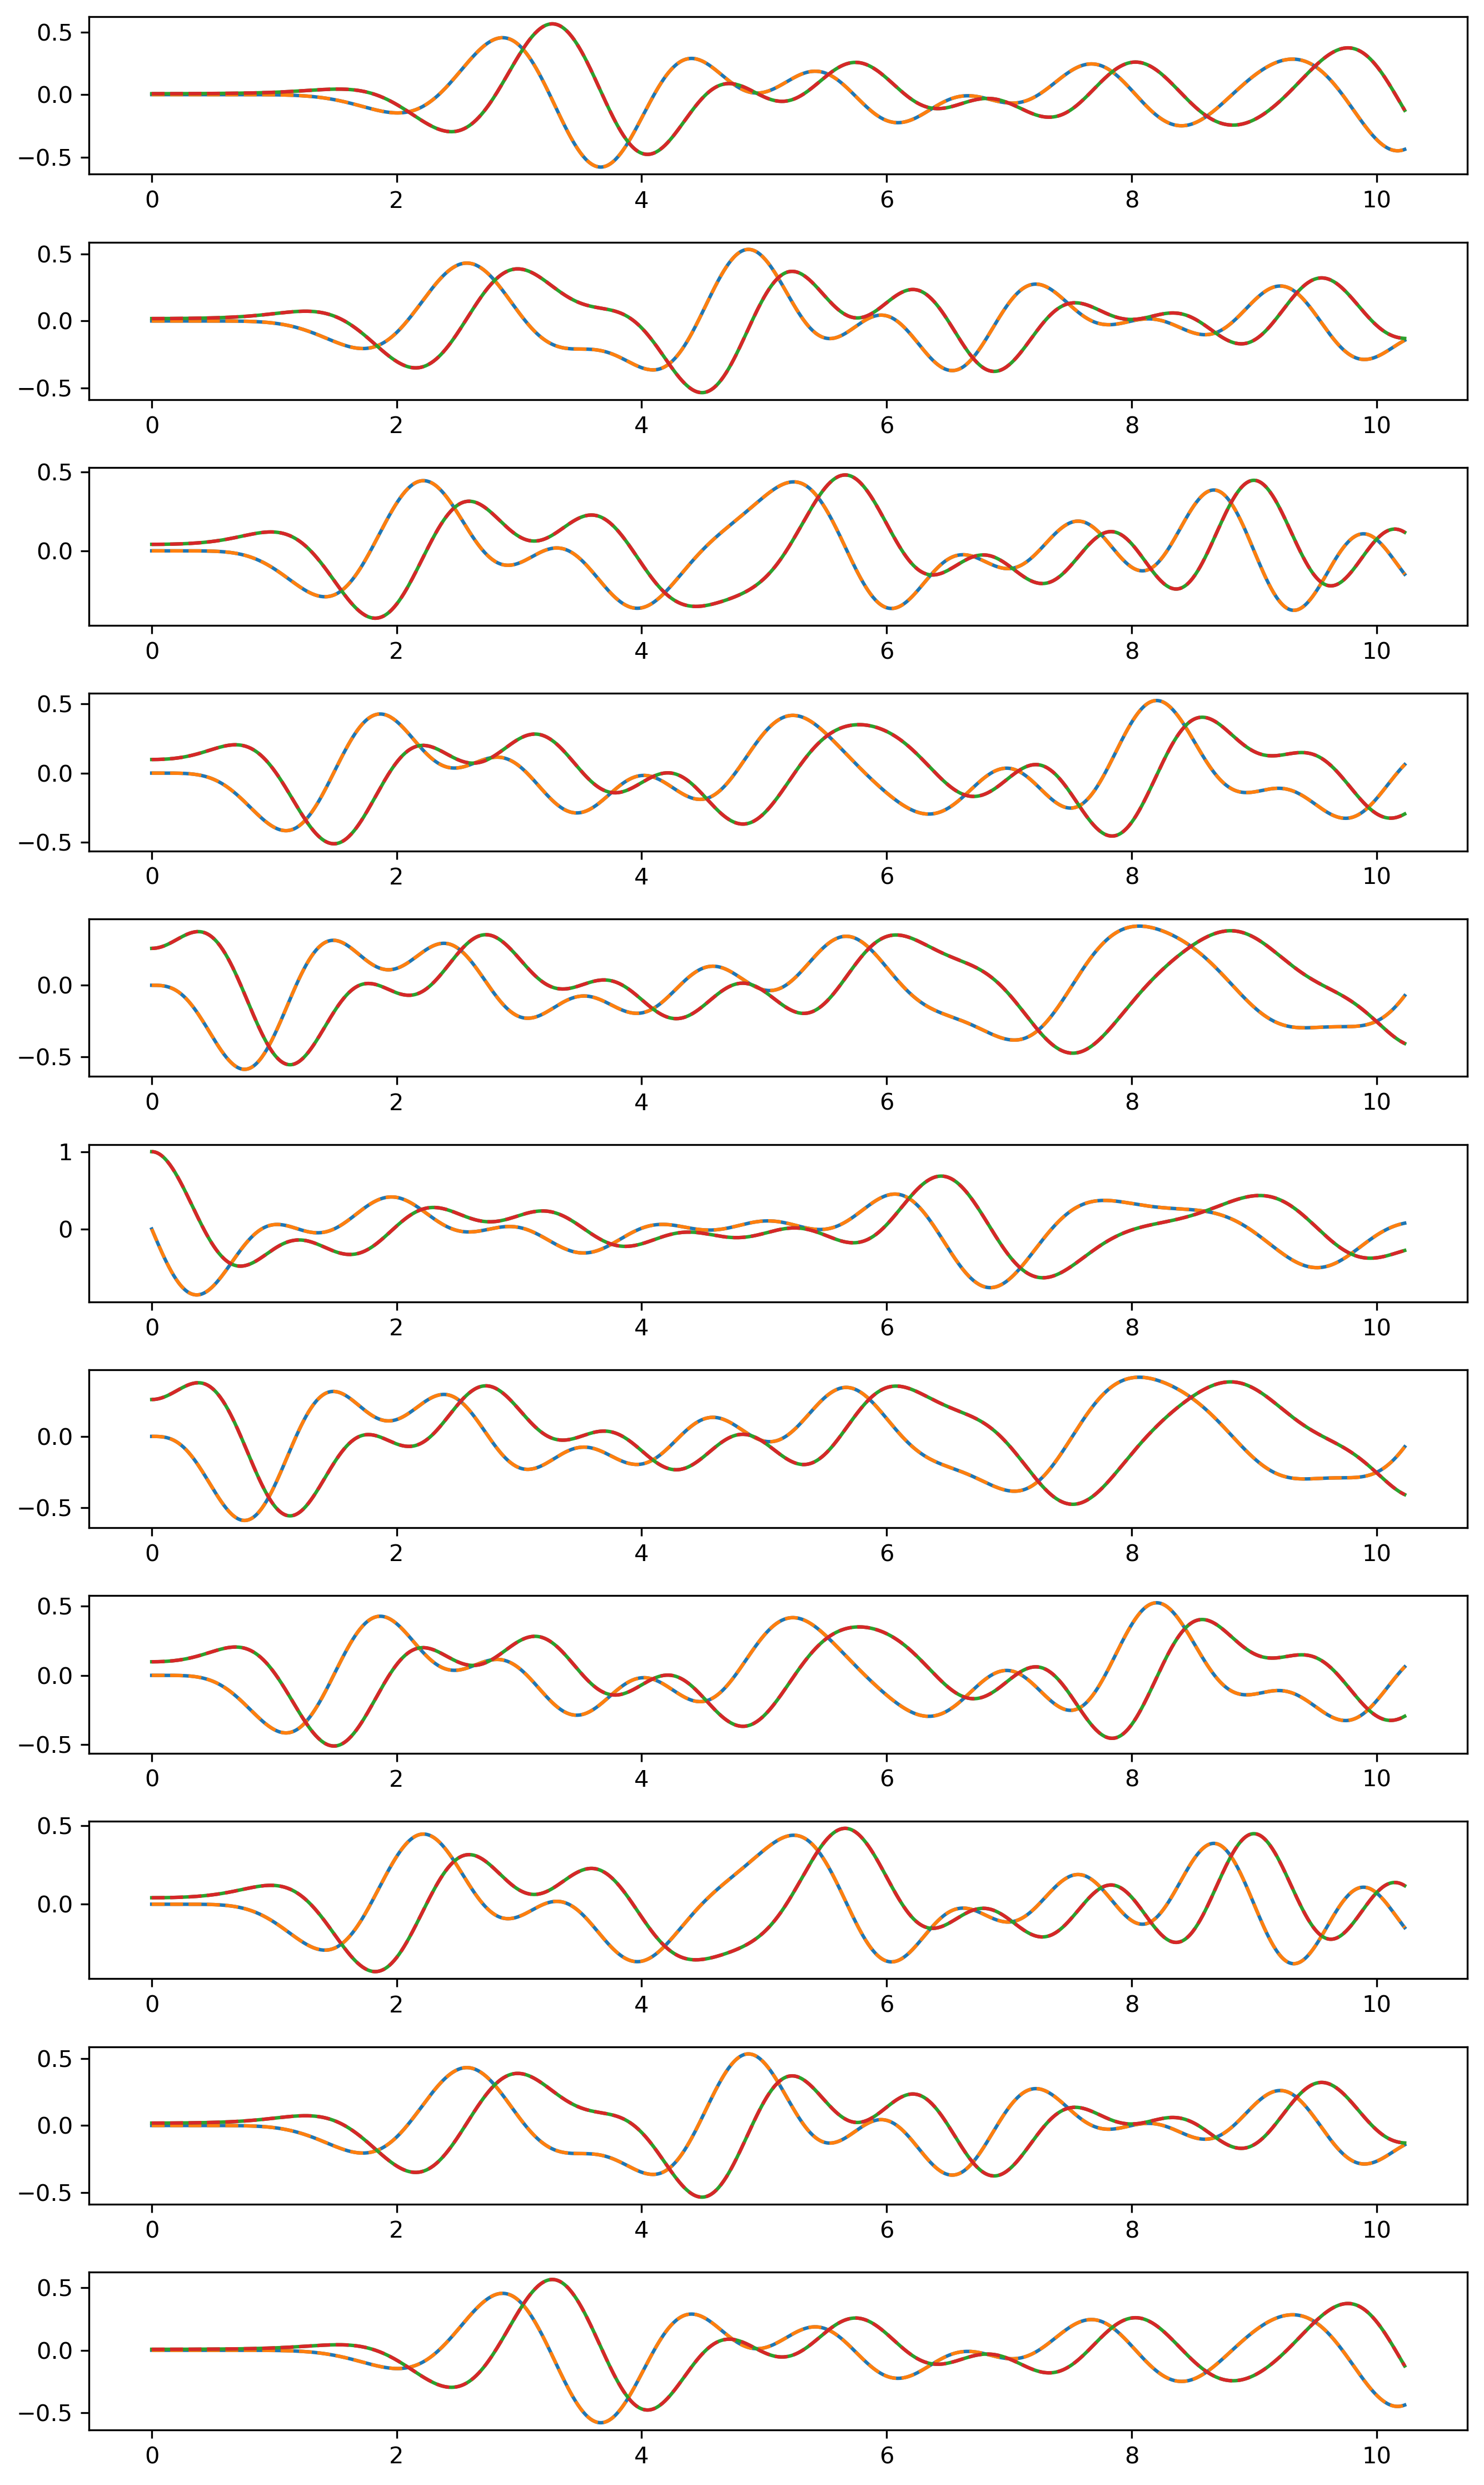

In [14]:
fig, axs = plt.subplots(nrows=D, figsize=(9,15), dpi=300)

D_list = np.arange(D)

for i,item in enumerate(D_list):
    axs[i].plot(ts, np.imag(func_vals[:,item]), '-')
    axs[i].plot(ts, np.imag(func_interp[:,item]), '--')
    axs[i].plot(ts, np.real(func_vals[:,item]), '-')
    axs[i].plot(ts, np.real(func_interp[:,item]), '--')
    #axs[i].set_xlim(0,0.2)

fig.tight_layout()

plt.show()